In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Iris.csv")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Removing the unneeded column

In [10]:
df.drop(columns='Id',inplace=True)

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Checking if there is any missing value

In [14]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


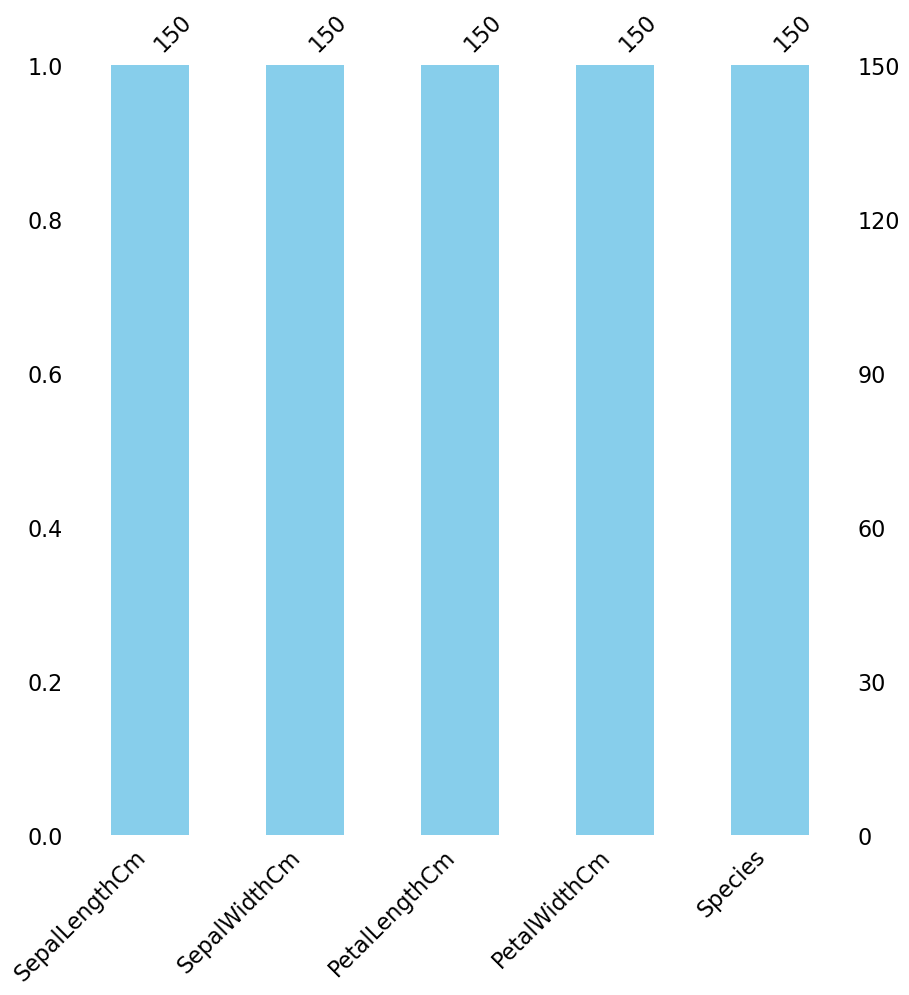

In [17]:
import missingno as msno
msno.bar(df,figsize=(10,10),color='skyblue')
plt.show()

# 2.Data Visualization

## 2.1 Scatterplot

C:\Users\SHUBHAM MURTADAK\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


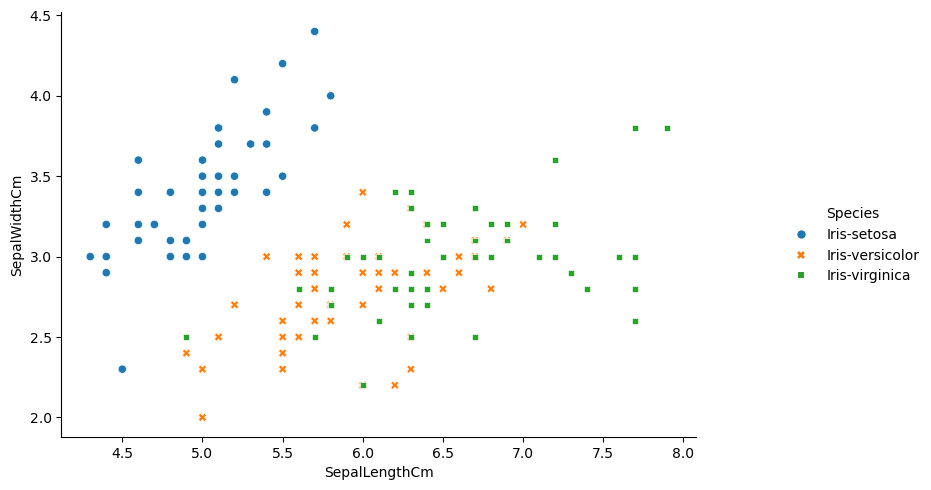

In [18]:
plot=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',style='Species')
plot.fig.set_size_inches(10,5)
plt.show()

C:\Users\SHUBHAM MURTADAK\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


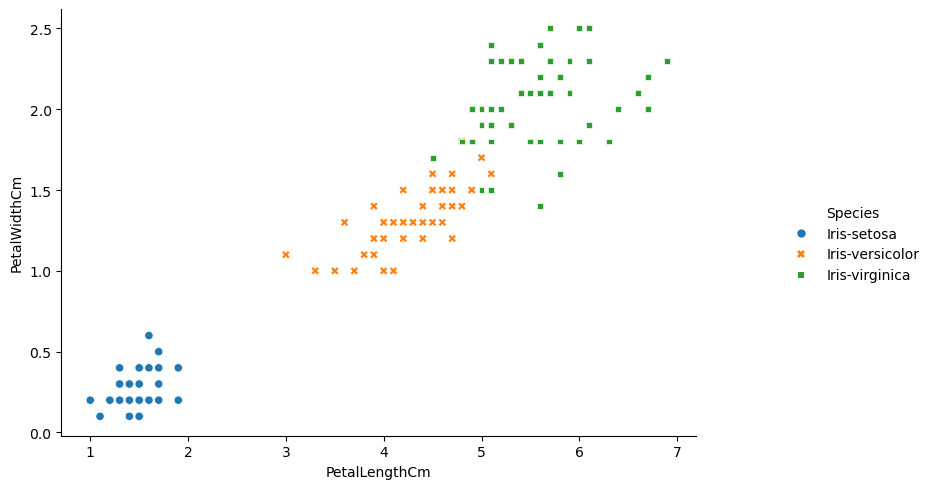

In [20]:
plot=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species',style='Species')
plot.fig.set_size_inches(10,5)
plt.show()

## 2.2 Pairplot

C:\Users\SHUBHAM MURTADAK\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


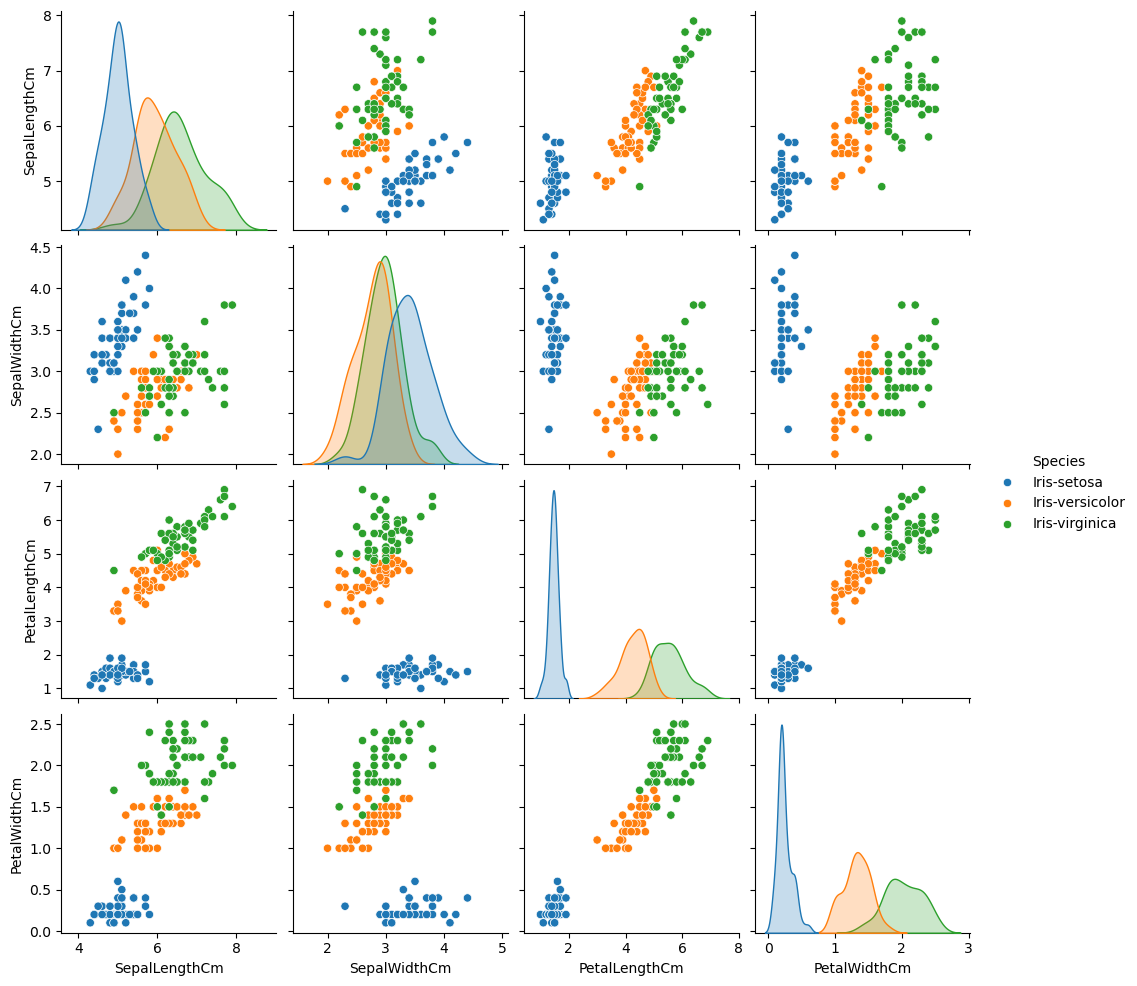

In [21]:
sns.pairplot(df,hue='Species')
plt.show()

# 2.3 Boxplot

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

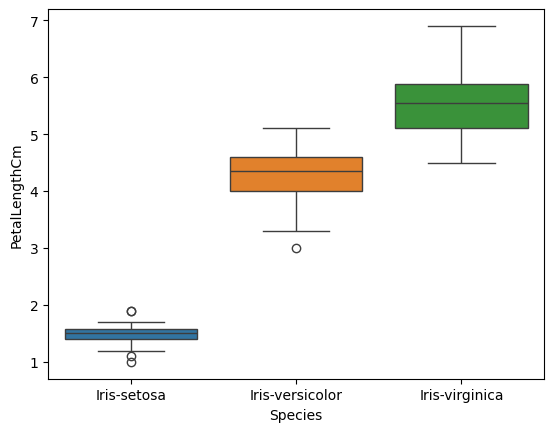

In [23]:
sns.boxplot(x='Species',y='PetalLengthCm',data=df,hue='Species')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

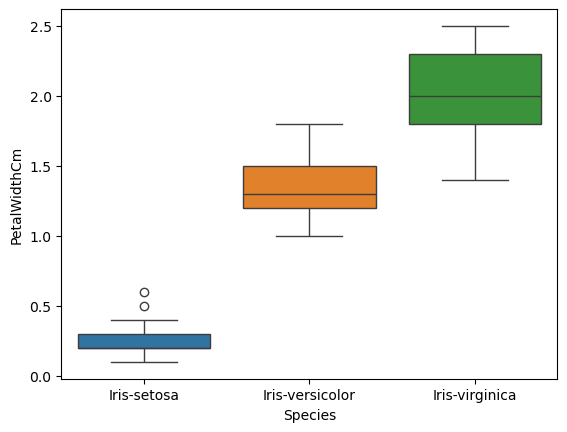

In [24]:
sns.boxplot(x='Species',y='PetalWidthCm',data=df,hue='Species')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

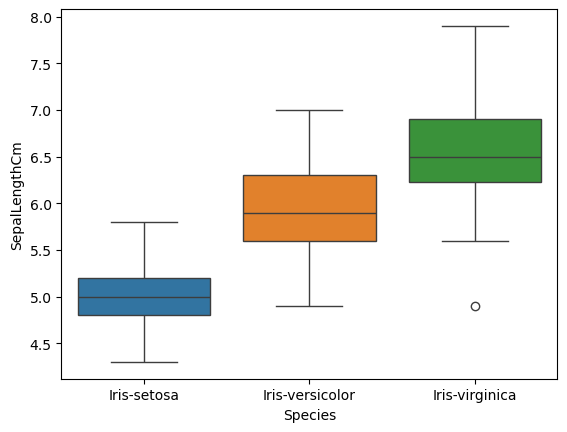

In [25]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df,hue='Species')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

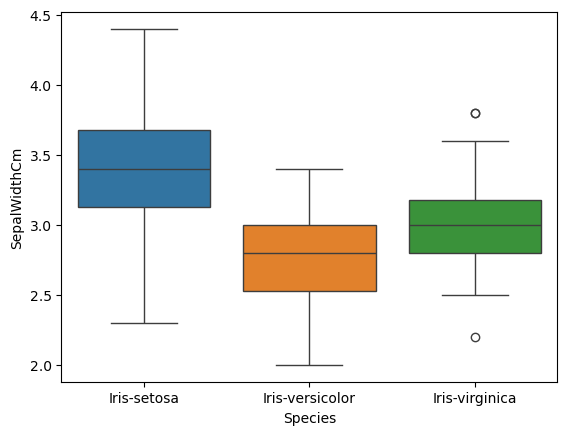

In [26]:
sns.boxplot(x='Species',y='SepalWidthCm',data=df,hue='Species')

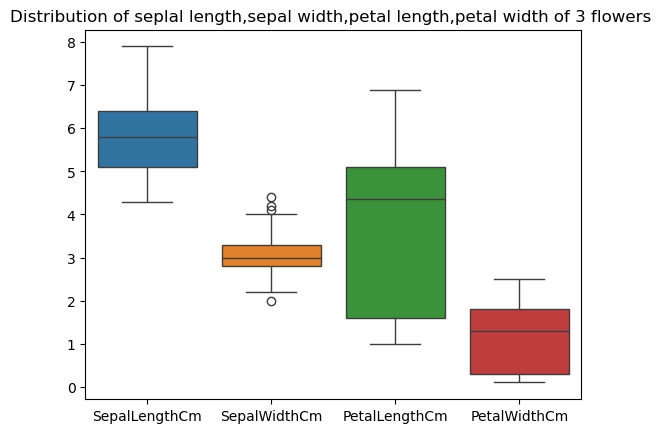

In [27]:
sns.boxplot(data=df).set_title("Distribution of seplal length,sepal width,petal length,petal width of 3 flowers ")
plt.show()

# 2.6 Corellation

In [31]:
numeric_df=df.drop(columns='Species')


In [32]:
numeric_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


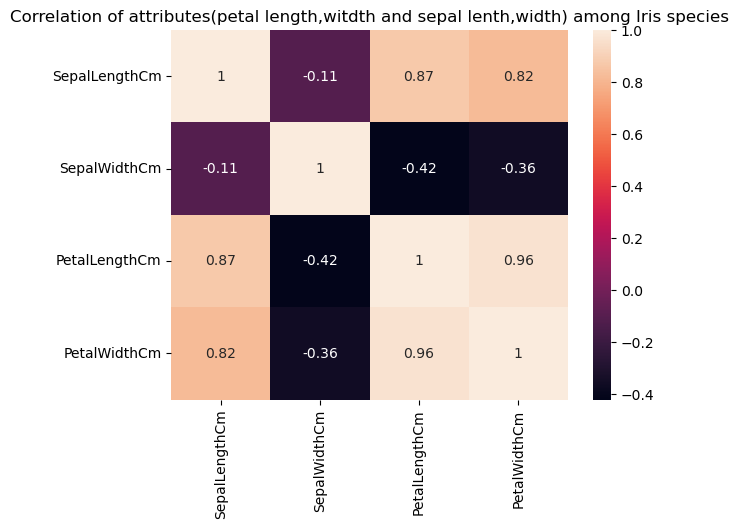

In [34]:
sns.heatmap(numeric_df.corr(),annot=True).set_title("Correlation of attributes(petal length,witdth and sepal lenth,width) among Iris species")
plt.show()

# Dividing data into features and labels

In [35]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]

In [36]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

## Label Encoding on species column

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 3.Building Machine leanring models

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix

# Splitting data into training and testing data

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)


In [43]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
53,5.5,2.3,4.0,1.3
141,6.9,3.1,5.1,2.3
78,6.0,2.9,4.5,1.5
97,6.2,2.9,4.3,1.3
143,6.8,3.2,5.9,2.3
...,...,...,...,...
75,6.6,3.0,4.4,1.4
43,5.0,3.5,1.6,0.6
22,4.6,3.6,1.0,0.2
72,6.3,2.5,4.9,1.5


In [44]:
y_train

array([1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0,
       1, 0])

In [45]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0
12,4.8,3.0,1.4,0.1
24,4.8,3.4,1.9,0.2
129,7.2,3.0,5.8,1.6
25,5.0,3.0,1.6,0.2
108,6.7,2.5,5.8,1.8
128,6.4,2.8,5.6,2.1
45,4.8,3.0,1.4,0.3


In [46]:
y_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1])

In [47]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [48]:
y_pred=model.predict(x_test)

In [77]:
accuracy=accuracy_score(y_test,y_pred)
# cm=confusion_matrix(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='macro')
recall=recall_score(y_test,y_pred,average='macro')
# name=f1_score(y_test,y_pred,average='macro')
print("confusion matrix for naive bayes :\n",cm)
print("\n")
print("accuracy for naiver bayes :",accuracy)
print("\n")
print("precision for naive bayes :",precision)
print("\n")
# print("f1 score for naive bayes :",f1)


confusion matrix for naive bayes :
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]


accuracy for naiver bayes : 0.9736842105263158


precision for naive bayes : 0.9722222222222222




In [78]:
# Extracting TP, FP, TN, FN
TP = cm[1][1]  # True Positives
FP = cm[0][1] + cm[2][1]  # False Positives
TN =cm[0][0] + cm[0][2] +cm[1][0] + cm[1][2] + cm[2][0] + cm[2][2]  # True Negatives
FN = cm[1][0] + cm[1][2]  # False Negatives

In [81]:
# Compute metrics
accuracy1 = (TP + TN) / (TP + TN + FP + FN)
error_rate = (FP + FN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Print results
print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)
print("\n")
print("Accuracy:", accuracy1)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

True Positives: 10
False Positives: 0
True Negatives: 28
False Negatives: 1


Accuracy: 0.9743589743589743
Error Rate: 0.02564102564102564
Precision: 1.0
Recall: 0.9090909090909091


# ENd